In [ ]:
# import necessary libraries for ETL process and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math



# Load CSV into a Pandas dataframe

df = pd.read_csv("https://gist.githubusercontent.com/javierIA/154c66e57da3915c75de447998c19822/raw/264cbe2e8ce1a5310d58d089c45c15a33057162b/datos.csv")
df.head()

,Gasto en Publicidad,Ventas
0,593.932154,26105.234131
1,743.670430,36153.420339
2,642.487038,30554.035033
3,590.394865,28936.021218
4,481.289319,22072.792618


In [ ]:
  df.describe()

,Gasto en Publicidad,Ventas
count,100.000000,100.000000
mean,525.514456,26190.585019
std,260.778614,13625.182833
min,104.225929,4799.173731
25%,285.222842,13735.215994
50%,520.732889,26141.342666
75%,716.034929,37169.998275
max,989.536454,58945.144366


In [ ]:
# Count of Null Values per Column
null_counts = df.isnull().sum()  # Count the null values in each column
print(null_counts)

Gasto en Publicidad    0
Ventas                 0
dtype: int64


In [ ]:
y=df[["Ventas"]]
y


,Ventas
0,26105.234131
1,36153.420339
2,30554.035033
3,28936.021218
4,22072.792618
...,...
95,12675.690453
96,27308.879490
97,6517.410585
98,34758.209585


In [ ]:
x=df[["Gasto en Publicidad"]]
x

,Gasto en Publicidad
0,593.932154
1,743.670430
2,642.487038
3,590.394865
4,481.289319
...,...
95,264.872226
96,627.861641
97,118.096792
98,846.046026


Text(0, 0.5, 'Ventas')

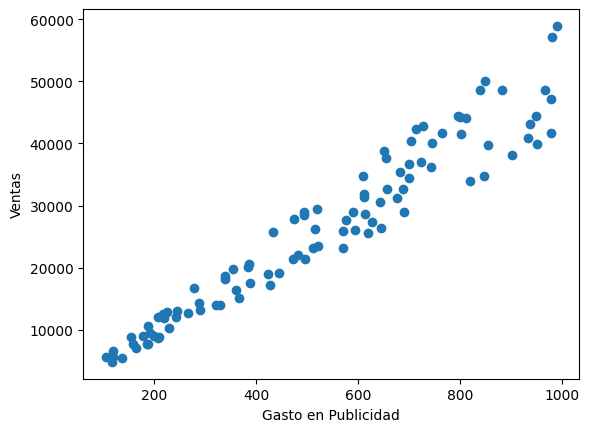

In [ ]:
plt.scatter(x, y)
plt.xlabel("Gasto en Publicidad")
plt.ylabel("Ventas")


In [ ]:
correlation = df['Gasto en Publicidad'].corr(df['Ventas'])
print(f"Correlacion entre Gastos de Publicidad y Ventas: {correlation:.2f}")


Correlacion entre Gastos de Publicidad y Ventas: 0.96


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Gasto en Publicidad']]
y = df['Ventas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Create instances of the linear regression models
ols_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# We can now use these models for data exploration and machine learning development.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

models = [
    ols_model, ridge_model, lasso_model, elasticnet_model
]

model_scores = []

# Train and Evaluate Models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_scores.append((model.__class__.__name__, mse, r2))

# Sort models based on R-squared score
sorted_models = sorted(model_scores, key=lambda x: x[2], reverse=True)

# Print results in sorted order
for model_name, mse, r2 in sorted_models:
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}")
    print("---------------------------------------------------------------")


Model: LinearRegression
Mean Squared Error: 10762353.25, R-squared: 0.92
---------------------------------------------------------------
Model: Ridge
Mean Squared Error: 10762358.05, R-squared: 0.92
---------------------------------------------------------------
Model: Lasso
Mean Squared Error: 10762361.00, R-squared: 0.92
---------------------------------------------------------------
Model: ElasticNet
Mean Squared Error: 10762549.39, R-squared: 0.92
---------------------------------------------------------------


Model: LinearRegression
Mean Squared Error: 10762353.25, R-squared: 0.92
---------------------------------------------------------------
Model: Ridge
Mean Squared Error: 10762358.05, R-squared: 0.92
---------------------------------------------------------------
Model: Lasso
Mean Squared Error: 10762361.00, R-squared: 0.92
---------------------------------------------------------------
Model: ElasticNet
Mean Squared Error: 10762549.39, R-squared: 0.92
---------------------------------------------------------------


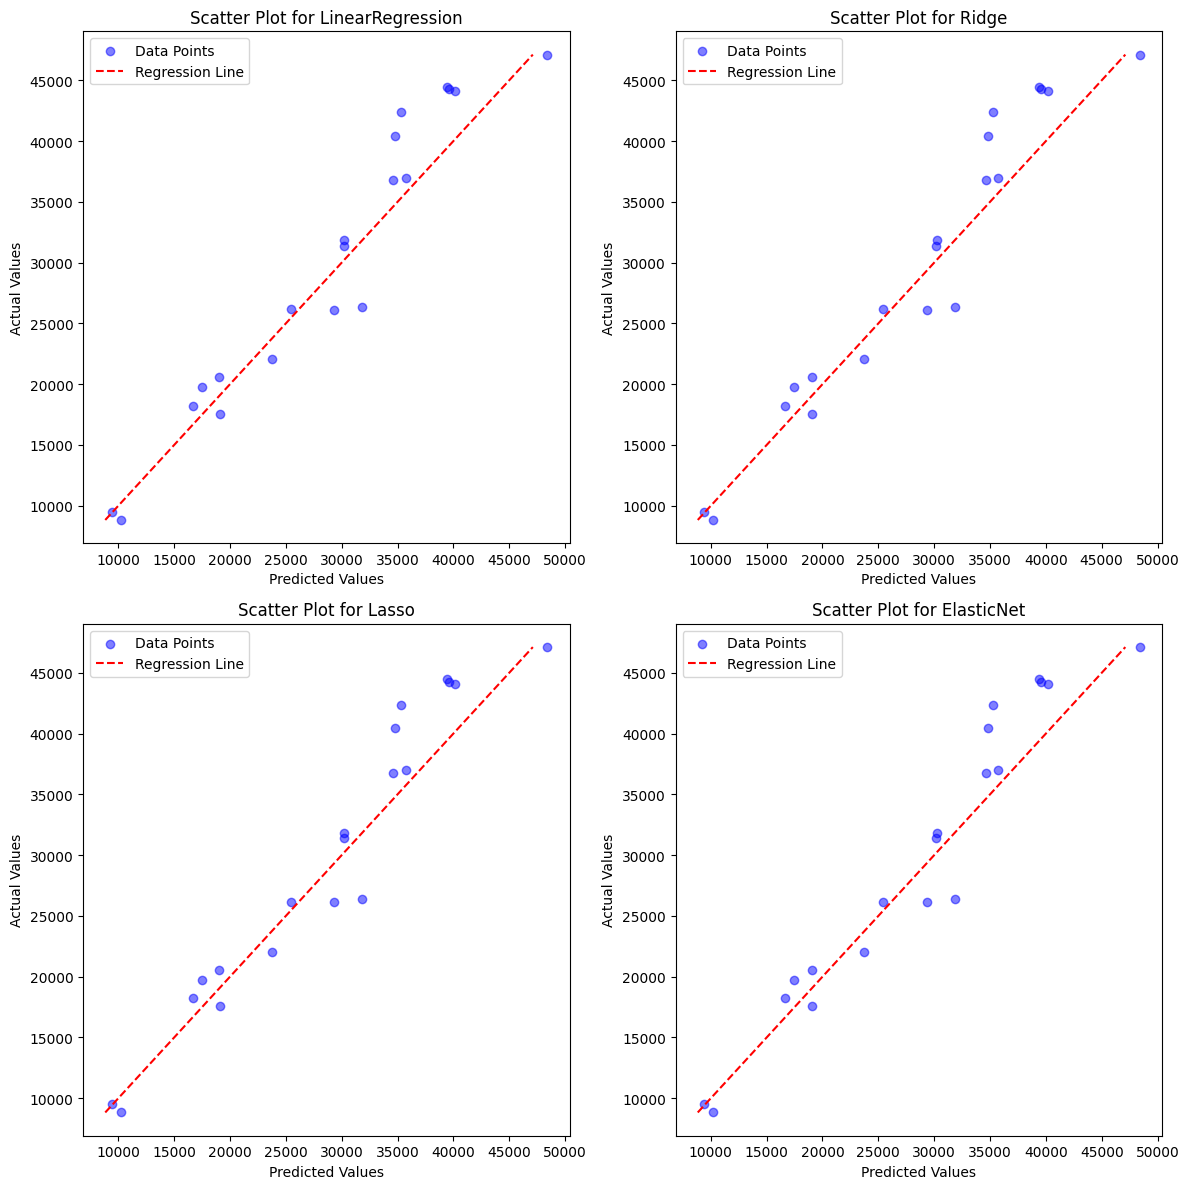

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = [
    ols_model, ridge_model, lasso_model, elasticnet_model
]

model_scores = []

# Train and Evaluate Models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_scores.append((model.__class__.__name__, mse, r2, y_pred))

# Sort models based on R-squared score
sorted_models = sorted(model_scores, key=lambda x: x[2], reverse=True)

# Create subplots in a 2-column layout
num_models = len(sorted_models)
num_rows = (num_models + 1) // 2  # Ensure odd number of models works too
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 6))
axes = axes.flatten()  # Flatten the 2D array of axes

# Print results and create scatter plots
for i, (model_name, mse, r2, y_pred) in enumerate(sorted_models):
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}")
    print("---------------------------------------------------------------")

    # Scatter plot with regression line
    axes[i].scatter(y_pred, y_test, color='blue', alpha=0.5)
    axes[i].set_xlabel('Predicted Values')
    axes[i].set_ylabel('Actual Values')
    axes[i].set_title(f'Scatter Plot for {model_name}')

    # Adding a regression line
    regression_line_x = np.linspace(min(y_test), max(y_test), num=100)
    regression_line_y = regression_line_x
    axes[i].plot(regression_line_x, regression_line_y, color='red', linestyle='--')

    axes[i].legend(['Data Points', 'Regression Line'])  # Show legend

# Adjust layout
plt.tight_layout()
plt.show()
